# Applied Machine Learning Systems (MLS-1) - ELEC0134

# Final Assignment - Classification of Tumours

## Task A - Binary Classification using Logistic Regression

## Completed by Student Number - 18014580

This is a Jupyter Notebook submitted as part of the final assignment submission package for the Applied Machine Learning Systems (MLS-1) coursework which involves tumor classification and identification.

This particular notebook tests the logistic regression method on Task A to find the accuracy of logistic regression for this particular task.

### Importing different packages

Initially, we must import the different packages needed for this task. The packages required to implement logistic regression for this binary task are pandas, sklearn (scikit-learn), skimage (scikit-image), and numpy. Please ensure these are installed in your virtualenv before running this code.

In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from skimage import io
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import seaborn as sns

#import tensorflow as tf
#from keras.preprocessing import image
import matplotlib.pyplot as plt

import os
from os import listdir

from datetime import datetime

print("All imports carried out successfully")

All imports carried out successfully


### Loading the data from the data sets

In this cell we are using read_csv to load the labels for each image into a dataframe. We then display the dataframe to ensure the data from the .csv file was loaded correctly.

In [74]:
#Loading the CSV file 'label' containing the different labels for each MRI Scan

tumour_labels = pd.read_csv('./dataset/label.csv')
print(tumour_labels.shape) #Outputs array with the shape of the dataframe to ensure all images, filenames and labels loaded

(3000, 2)


In [75]:
tumour_labels #Displaying data frame to visually ensure data loaded correctly

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor
...,...,...
2995,IMAGE_2995.jpg,no_tumor
2996,IMAGE_2996.jpg,meningioma_tumor
2997,IMAGE_2997.jpg,glioma_tumor
2998,IMAGE_2998.jpg,glioma_tumor


### Printing out dataset to ensure labels changed accordingly

This is a binary classification task, so in the cells below, we modify the data frame by locating all the images whose label is not "no_tumor" and setting them to tumor rather than having them as the types of tumor.

In [76]:
#change anything in the label column that is not equal to "no_tumor" to "tumor" rather than the type of tumor
tumour_labels.loc[tumour_labels['label']!= 'no_tumor', 'label'] = 'tumor' 

In [77]:
tumour_labels #Displaying data frame to visually ensure labels changed as specified in cell above

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
2995,IMAGE_2995.jpg,no_tumor
2996,IMAGE_2996.jpg,tumor
2997,IMAGE_2997.jpg,tumor
2998,IMAGE_2998.jpg,tumor


### Adding binary integer representation to the data frame

In the cells below, we add another column to the data frame and assign a numeric value label to each label. Since our problem is binary, the numeric label can only be 1 or 0.

If the label indicates "tumor" it is assigned a numeric label 1, and if the label does not indicate a tumour "no_tumor" it is assigned the numeric label 0. It also increases adaptability or convenience of the code if deep-learning models were to be used to have numeric label rather than a text label.

In [78]:
#Accessing all columns where the 'label' column is 'tumor' and assigning it the value 1 in a new numeric label colum
#Accessing all columns where the 'label' column is 'no_tumor' and assigning it the value 0 in a new numeric label colum

#tumour_labels.loc[tumour_labels['label'] == 'tumor', 'numeric label'] = int(1) # 'tumor' in label column assigned 1
#tumour_labels.loc[tumour_labels['label'] == 'no_tumor', 'numeric label'] = int(0) #'no_tumor' in label column assigned 0

classes = ['no_tumor', 'tumor']
for CLASS in classes:
    tumour_labels.loc[tumour_labels['label'] == CLASS, 'numeric label'] = classes.index(CLASS)

In [79]:
tumour_labels #Displaying dataframe to ensure new column created and values are being assigned properly

,file_name,label,numeric label
0,IMAGE_0000.jpg,tumor,1.0
1,IMAGE_0001.jpg,no_tumor,0.0
2,IMAGE_0002.jpg,tumor,1.0
3,IMAGE_0003.jpg,tumor,1.0
4,IMAGE_0004.jpg,tumor,1.0
...,...,...,...
2995,IMAGE_2995.jpg,no_tumor,0.0
2996,IMAGE_2996.jpg,tumor,1.0
2997,IMAGE_2997.jpg,tumor,1.0
2998,IMAGE_2998.jpg,tumor,1.0


### Choosing mode and loading the images

In the cell below, we give the user the option to select whether or not to convert the images from RGB to greyscale as their could be different in runtime and accuracy. Any such results will be reported in the written report. Below are some average metrics for RGB and Greyscale.

In the runs carried out, the average metrics for each are:

RGB (Accuracy, Time Taken ...)
Grayscale (Accuracy, Time Taken ... )

In [80]:
print('As default, this program loads images with their RGB channels. Would you like to change the images to grayscale? \n')
color_mode = input('Please type in Yes or No: ')

if color_mode.lower().startswith("y"):
    print("\n You selected Yes. The images will be loaded as Grayscale images.")
elif color_mode.lower().startswith("n"):
    print("\n You selected No. The images will be loaded with their RGB channels.")
else:
    print("\n Invalid choice. Please select Yes or No.")
    color_mode = input('\n Please type in Yes or No: ')

As default, this program loads images with their RGB channels. Would you like to change the images to grayscale? 

Please type in Yes or No: y

 You selected Yes. The images will be loaded as Grayscale images.


In the cell below, we load the image files using the imread functions from the scikit-image package. We convert the images to numpy arrays before appending them to a list. This list of arrays is then converted to a numpy array of arrays to allow us to print the shape to verify all the images have been loaded.

This cell also uses datetime.now() to output the time elapsed to load the image set. This was used to compare efficiency of different imread functions from different packages including skimage, cv2 etc. In the end, skimage was chosen as it produced slightly favourable results.

The time elapsed to load the images was:  0:00:36.417455
(3000, 512, 512)


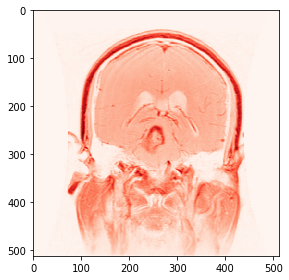

In [81]:
#Uncomment to verify contents of the directory loaded

#dirname = './dataset/image'
#print(listdir(dirname))

#Code used to test timing

start = datetime.now() #Stores the time at which loading starts

images = [] #An empty list is created

#If statement uses user input color_mode to decide whether to convert images to greyscale or not before populating list
#The for loops reads all images from the directory as listdir allows it loop through name of all files in the directory

if color_mode.lower().startswith("n"):
    for file in listdir('./dataset/image'): 
        img = io.imread('./dataset/image/' + file) 
        img = np.array(img) #Converting image loaded to a numpy array
        images.append(img) #Appending the img as a numpy array into the list images
        
        #This can be uncommented if we want to show all the images but data is too large so we usually don't
        #plt.figure()
        #plt.imshow(img)
        
elif color_mode.lower().startswith("y"):
    for file in listdir('./dataset/image'):
        img = io.imread('./dataset/image/' + file)
        greyimg = rgb2gray(img) #Converting each image to grayscale 
        greyimg = np.array(greyimg) #Converting image loaded to a numpy array
        images.append(greyimg) #Appending the img as a numpy array into the list images
        
        #plt.figure()
        #plt.imshow(img)
    
#Marking the end of the code
end = datetime.now()
elapsed = end - start #Calculating time elapsed while comparing different packages used to load images
print('The time elapsed to load the images was: ', + elapsed) 


#The red colormap applied will only appear if it is a grayscalew image. The image is chosen randomly to be images[45]
io.imshow(np.array(images[45]), cmap='Reds') #Verifying visually if the image is greyscale or not by applying red colormap


print(np.array(images).shape) #Converting list images to a numpy array before outputting shape to verify 

### Splitting the data into training and testing data

In the cells below, we use train_test_split from the model_selection part of the sklearn package. This splits the data into training and testing data before we train the model. The testing data is left unseen so we can test our trained model using it.

In [86]:
X = np.array(images) #Set X to contain the array of images
Y = tumour_labels['numeric label'] #Set Y to contain the corresponding numeric labels of each image
if len(X.shape) == 4:
    X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
else:
    X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
    
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(.95)
X = pca.fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state = 0) #Set random_state to 0 for reproducibility

print(xTrain.shape) #Printing the shape of xTrain to veryify data was split correctly
print(xTest.shape) #Printing the shape of xTest to verify  data was split correctly
train_size = xTrain.shape[0]
test_size = xTest.shape[0]

(2250, 824)
(750, 824)


### Reshaping xTrain and xTest for use in ML models and verifying the reshape

These cells reshape xTrain and xTest to 2-dimensional arrays and verifies they have been correctly reshaped depending on whether or not they were converted to grayscale.

In [ ]:
#Reshaping xTrain and xTest each to 2-dimensional arrays to allow them to be input into models such as Logistic Reg and SVMs

#If statement to control reshaping of xTrain and xTest dependent if using RGB or Grayscale
#If RGB then .shape arrays will have 4 elements, so we reshape using [1], [2] and [3] from xTrain.shape
#Otherwise, if Grayscale .shape arrays will only have 3 elements so we reshape using only [1] and [2] as there is no [3]

if len(xTrain.shape) == 4:
    xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1]*xTrain.shape[2]*xTrain.shape[3])
    xTest = xTest.reshape(xTest.shape[0], xTest.shape[1]*xTest.shape[2]*xTest.shape[3])
elif len(xTrain.shape) == 3:
    xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1]*xTrain.shape[2])
    xTest = xTest.reshape(xTest.shape[0], xTest.shape[1]*xTest.shape[2])   
if len(X.shape) == 4:
    X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
else:
    X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])

In [ ]:
xTest.shape #Visually verifying xTest has been reshaped

In [ ]:
if color_mode.lower().startswith("n"):
    if xTrain.shape[0] == train_size and xTrain.shape[1] == 512*512*3:
        print('xTrain reshaped correctly')
    else: print('xTrain reshaped incorrectly')
    if xTest.shape[0] == test_size and xTest.shape[1] == 512*512*3:
        print('xTest reshaped correctly')
    else: print('xTest reshaped incorrectly')
elif color_mode.lower().startswith("y"):
    if xTrain.shape[0] == train_size and xTrain.shape[1] == 512*512:
        print('xTrain reshaped correctly')
    else: print('xTrain reshaped incorrectly')
    if xTest.shape[0] == test_size and xTest.shape[1] == 512*512:
        print('xTest reshaped correctly')
    else: print('xTest reshaped incorrectly')

### Training

In [87]:
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(xTrain,yTrain)

/home/zceened/.conda/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/zceened/.conda/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

KeyboardInterrupt: 

In [88]:
model_start = datetime.now()
model = LogisticRegression(solver = 'saga')
model.fit(xTrain, yTrain)
model_end = datetime.now()
model_time = model_end - model_start
print('The training time for this model was: ', model_time)

The training time for this model was:  0:00:01.695317


/home/zceened/.conda/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [89]:
y_Pred = model.predict(xTest)

In [90]:
print('Accuracy on test set: '+str(accuracy_score(yTest,y_Pred)))
print(classification_report(yTest,y_Pred)) #A text report displaying the main classification metrics

Accuracy on test set: 0.744
              precision    recall  f1-score   support

         0.0       0.38      0.88      0.53       123
         1.0       0.97      0.72      0.82       627

    accuracy                           0.74       750
   macro avg       0.67      0.80      0.68       750
weighted avg       0.87      0.74      0.78       750



In [91]:
acc = model.score(xTest, yTest)

In [92]:
conf_olddata = confusion_matrix(yTest, y_Pred)

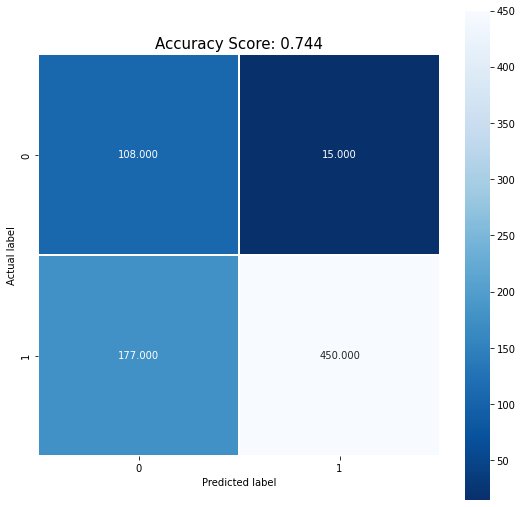

In [93]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_olddata, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

### Testing and reporting new accuracy score using updated test set uploaded on XX Dec

### Testing and reporting new accuracy score using updated test set 

In the following cells we use similar methods to the ones we had above to load the images from the new test set uploaded, 

In [21]:
new_tumour_labels = pd.read_csv('./test/label.csv')
print(new_tumour_labels.shape) #Outputs array with the shape of the dataframe to ensure all images, filenames and labels loaded

(200, 2)


In [22]:
new_tumour_labels

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,meningioma_tumor
2,IMAGE_0002.jpg,glioma_tumor
3,IMAGE_0003.jpg,pituitary_tumor
4,IMAGE_0004.jpg,glioma_tumor
...,...,...
195,IMAGE_0195.jpg,pituitary_tumor
196,IMAGE_0196.jpg,no_tumor
197,IMAGE_0197.jpg,meningioma_tumor
198,IMAGE_0198.jpg,no_tumor


In [23]:
#change anything in the label column that is not equal to "no_tumor" to "tumor" rather than the type of tumor
new_tumour_labels.loc[new_tumour_labels['label']!= 'no_tumor', 'label'] = 'tumor' 

In [24]:
new_tumour_labels

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
195,IMAGE_0195.jpg,tumor
196,IMAGE_0196.jpg,no_tumor
197,IMAGE_0197.jpg,tumor
198,IMAGE_0198.jpg,no_tumor


In [25]:
for CLASS in classes:
    new_tumour_labels.loc[new_tumour_labels['label'] == CLASS, 'numeric label'] = classes.index(CLASS)

In [26]:
new_tumour_labels

,file_name,label,numeric label
0,IMAGE_0000.jpg,tumor,1.0
1,IMAGE_0001.jpg,tumor,1.0
2,IMAGE_0002.jpg,tumor,1.0
3,IMAGE_0003.jpg,tumor,1.0
4,IMAGE_0004.jpg,tumor,1.0
...,...,...,...
195,IMAGE_0195.jpg,tumor,1.0
196,IMAGE_0196.jpg,no_tumor,0.0
197,IMAGE_0197.jpg,tumor,1.0
198,IMAGE_0198.jpg,no_tumor,0.0


The time elapsed to load the images was:  0:00:01.155394
(200, 512, 512)


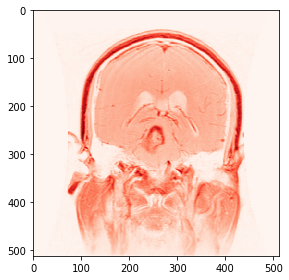

In [27]:
#Code used to test timing

start = datetime.now() #Stores the time at which loading starts

validation_images = [] #An empty list is created

#If statement uses user input color_mode to decide whether to convert images to greyscale or not before populating list
#The for loops reads all images from the directory as listdir allows it loop through name of all files in the directory

if color_mode.lower().startswith("n"):
    for file in listdir('./test/image'): 
        img = io.imread('./test/image/' + file) 
        img = np.array(img) #Converting image loaded to a numpy array
        validation_images.append(img) #Appending the img as a numpy array into the list images
        
        #This can be uncommented if we want to show all the images but data is too large so we usually don't
        #plt.figure()
        #plt.imshow(img)
        
elif color_mode.lower().startswith("y"):
    for file in listdir('./test/image'):
        img = io.imread('./dataset/image/' + file)
        greyimg = rgb2gray(img) #Converting each image to grayscale 
        greyimg = np.array(greyimg) #Converting image loaded to a numpy array
        validation_images.append(greyimg) #Appending the img as a numpy array into the list images
        
        #plt.figure()
        #plt.imshow(img)
    
#Marking the end of the code
end = datetime.now()
elapsed = end - start #Calculating time elapsed while comparing different packages used to load images
print('The time elapsed to load the images was: ', + elapsed) 


#The red colormap applied will only appear if it is a grayscalew image. The image is chosen randomly to be images[45]
io.imshow(np.array(validation_images[45]), cmap='Reds') #Verifying visually if the image is greyscale or not by applying red colormap


print(np.array(validation_images).shape) #Converting list images to a numpy array before outputting shape to verify 

In [28]:
x_val = np.array(validation_images)
y_val = new_tumour_labels['numeric label']
print(x_val.shape)

x_val_size = x_val.shape[0]

(200, 512, 512)


In [29]:
if len(x_val.shape) == 4:
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2]*x_val.shape[3])
elif len(x_val.shape) == 3:
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2]) 

In [30]:
x_val.shape

(200, 262144)

In [31]:
if color_mode.lower().startswith("n"):
    if x_val.shape[0] == x_val_size and x_val.shape[1] == 512*512*3:
        print('Array reshaped correctly')
    else: print('Array reshaped incorrectly')
elif color_mode.lower().startswith("y"):
    if x_val.shape[0] == x_val_size and x_val.shape[1] == 512*512:
        print('Array reshaped correctly')
    else: print('Array reshaped incorrectly')

Array reshaped correctly


In [32]:
y_val_Pred = model.predict(x_val)

In [33]:
print('Accuracy on new validation set: '+str(accuracy_score(y_val,y_val_Pred)))
print(classification_report(y_val,y_val_Pred)) #A text report displaying the main classification metrics

Accuracy on new validation set: 0.75
              precision    recall  f1-score   support

         0.0       0.16      0.08      0.11        37
         1.0       0.81      0.90      0.85       163

    accuracy                           0.75       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.69      0.75      0.72       200



In [34]:
acc_new = model.score(x_val, y_val)

In [35]:
conf_newdata = confusion_matrix(y_val, y_val_Pred)

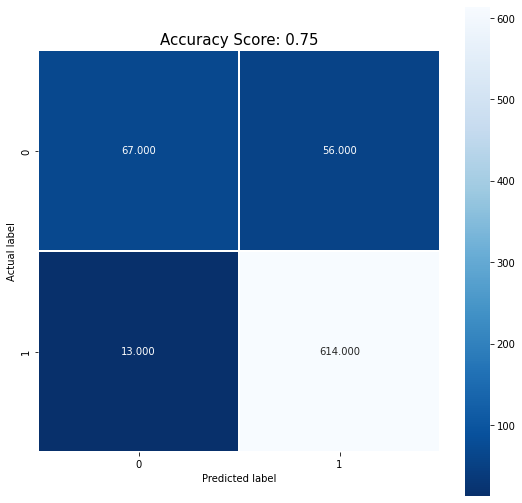

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_olddata, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_new)
plt.title(all_sample_title, size = 15);

### Plot the confusion matrix and then show which images were misclassified and see if they are the same each time

### See if any specific techniques can be used to help with the images

### Training loss, validation loss and hyperpara tuning